## **LOGISTIC REGRESSION**

1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('https://raw.githubusercontent.com/kartikjindgar/NYU-DataScience-Bootcamp-Fall23/main/Week7/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Amount of glass per type
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [ ]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [ ]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
print("Coefficient: ", logreg.coef_, " Intercept: ", logreg.intercept_)

Coefficient:  [[3.11517927]]  Intercept:  [-6.00934605]


Text(0, 0.5, 'household')

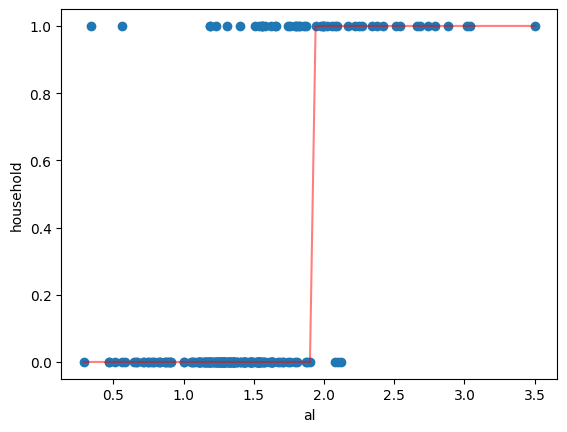

In [ ]:
glass.sort_values( by = 'Al', inplace=True)

# Plot the class predictions.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red', alpha=0.5)
plt.xlabel('al')
plt.ylabel('household')

In [ ]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

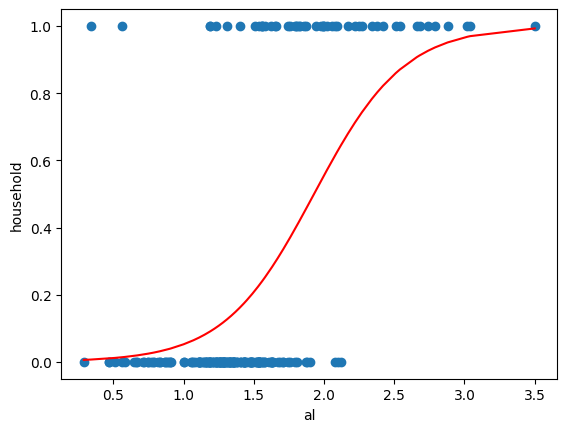

In [ ]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(y_true=y, y_pred=pred))
print("Precision: ", precision_score(y_true=y, y_pred=pred))
print("Recall: ", recall_score(y,pred))

Accuracy:  0.8691588785046729
Precision:  0.896551724137931
Recall:  0.5098039215686274


**Q1. Try different thresholds for computing predictions and see their impact on Accuracy, Precision and Recall**

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    pred = (glass['household_pred_prob'] > threshold)

    accuracy = accuracy_score(y_true=y, y_pred=pred)
    precision = precision_score(y_true=y, y_pred=pred)
    recall = recall_score(y_true=y, y_pred=pred)
    print("Threshold: ", threshold)
    print("Accuracy: ", accuracy_score(y_true=y, y_pred=pred))
    print("Precision: ", precision_score(y_true=y, y_pred=pred))
    print("Recall: ", recall_score(y,pred))
    print("")

Threshold:  0.3
Accuracy:  0.8644859813084113
Precision:  0.72
Recall:  0.7058823529411765

Threshold:  0.4
Accuracy:  0.8785046728971962
Precision:  0.8205128205128205
Recall:  0.6274509803921569

Threshold:  0.5
Accuracy:  0.8691588785046729
Precision:  0.896551724137931
Recall:  0.5098039215686274

Threshold:  0.6
Accuracy:  0.8411214953271028
Precision:  0.8695652173913043
Recall:  0.39215686274509803

Threshold:  0.7
Accuracy:  0.8364485981308412
Precision:  1.0
Recall:  0.3137254901960784



**Q2. Do the same analysis for other columns**

In [ ]:
# Na Column Analysis
glass.sort_values( by = 'Na', inplace=True)
X = np.array(glass.Na).reshape(-1,1)
y = glass.household

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
print("Coefficient: ", logreg.coef_, " Intercept: ", logreg.intercept_)

Coefficient:  [[1.55119327]]  Intercept:  [-22.24455281]


Text(0, 0.5, 'household')

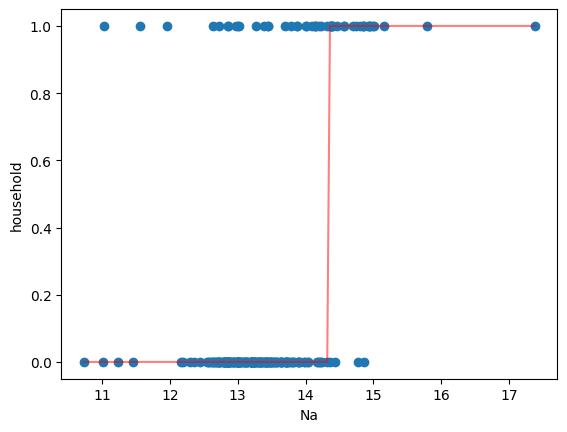

In [ ]:
glass.sort_values( by = 'Na', inplace=True)

plt.scatter(glass.Na, glass.household)
plt.plot(glass.Na, pred, color='red', alpha=0.5)
plt.xlabel('Na')
plt.ylabel('household')

Accuracy:  0.8551401869158879
Precision:  0.8571428571428571
Recall:  0.47058823529411764


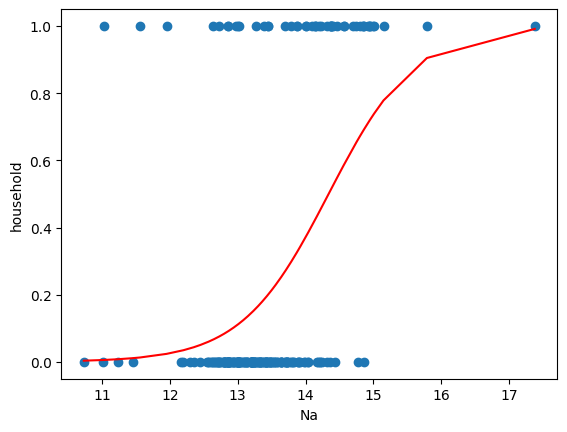

In [ ]:
glass['household_pred_prob_Na'] = logreg.predict_proba(X)[:, 1]

plt.scatter(glass.Na, glass.household)
plt.plot(glass.Na, glass.household_pred_prob_Na, color='red')
plt.xlabel('Na')
plt.ylabel('household')

print("Accuracy: ", accuracy_score(y_true=y, y_pred=pred))
print("Precision: ", precision_score(y_true=y, y_pred=pred))
print("Recall: ", recall_score(y,pred))

**Q3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = glass.drop('Type', axis=1)
y = glass.household
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


**Q4. Plot ROC Curves for each model**

Text(0, 0.5, 'True Positive Rate')

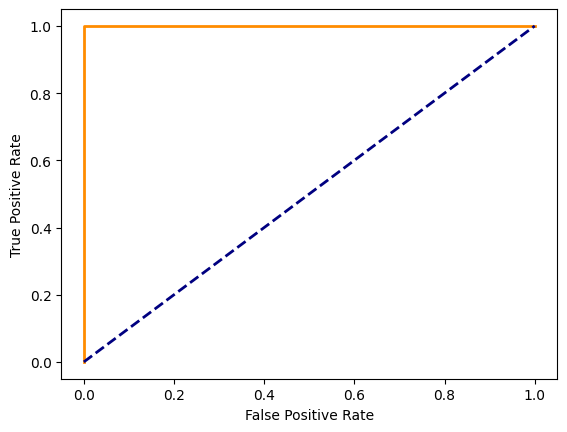

In [ ]:
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## **CLUSTERING**
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# Check out the dataset and our target values
df = pd.read_csv("https://raw.githubusercontent.com/kartikjindgar/NYU-DataScience-Bootcamp-Fall23/main/Week7/iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


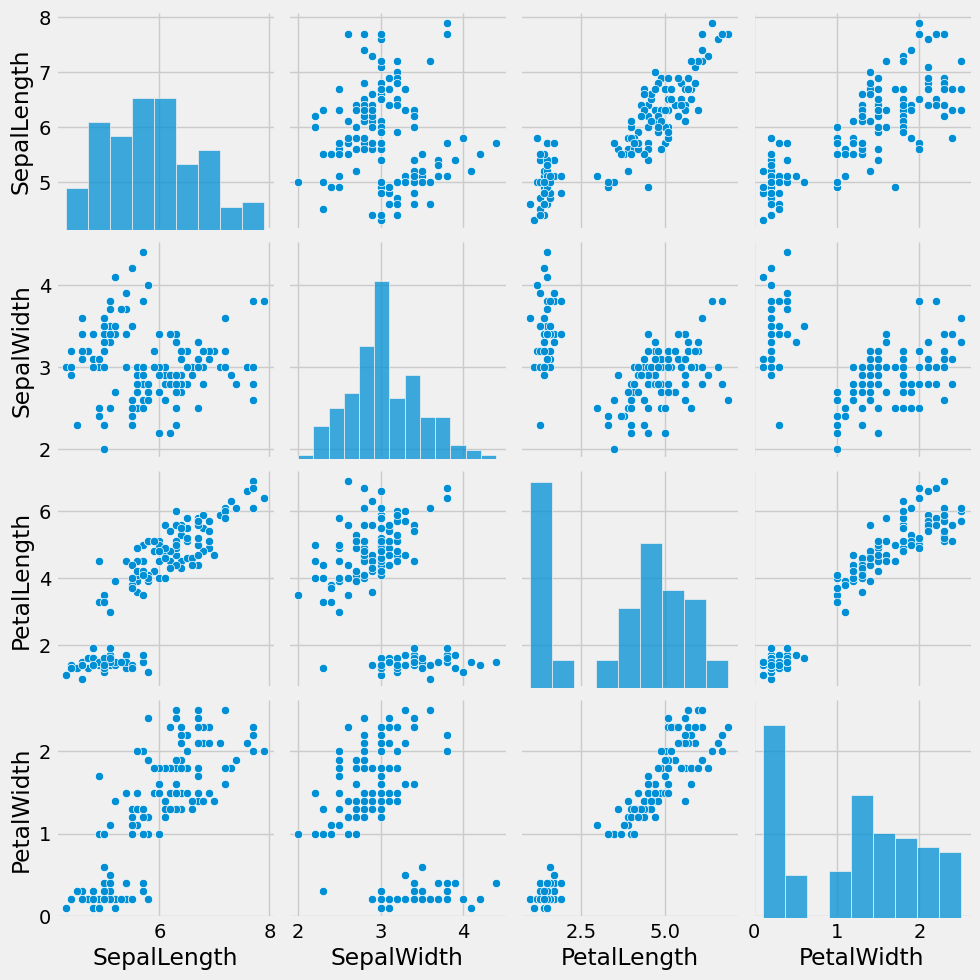

In [ ]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [ ]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [ ]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

In [ ]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


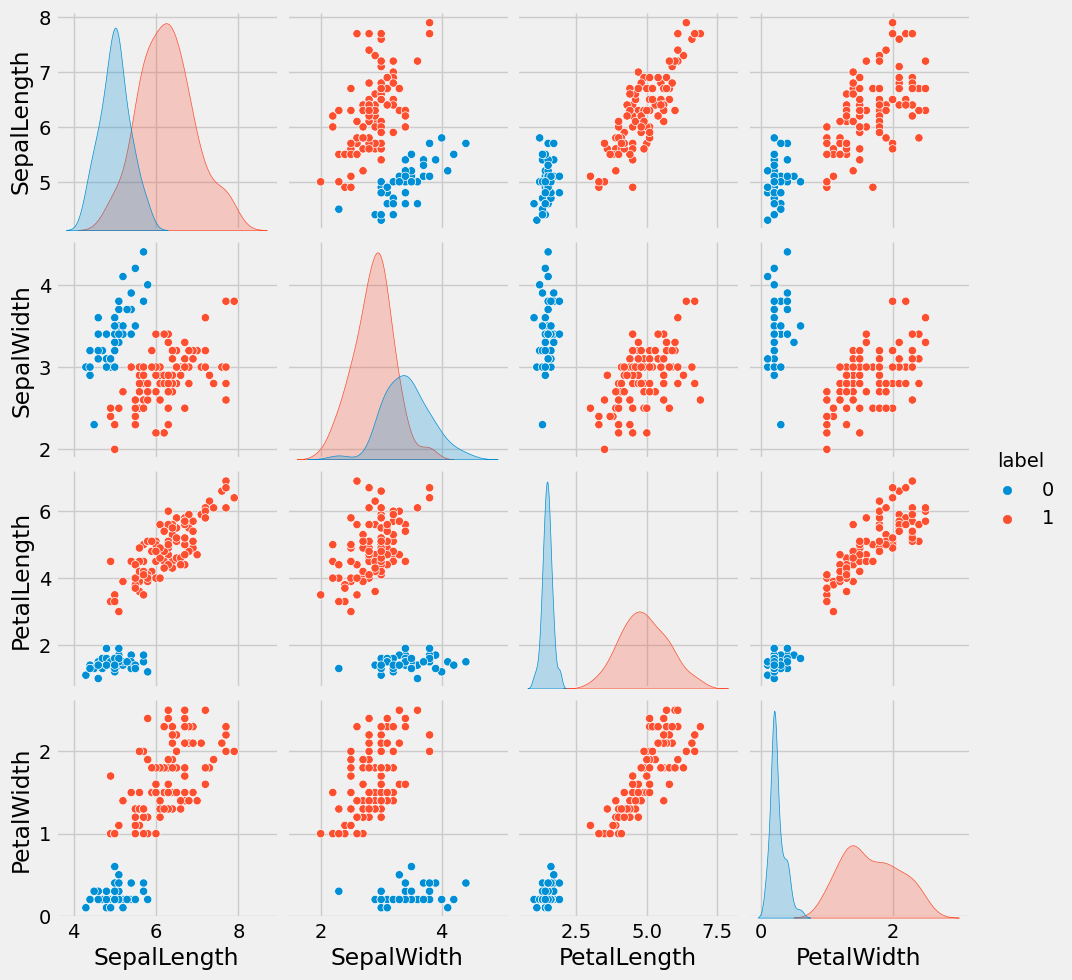

In [ ]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

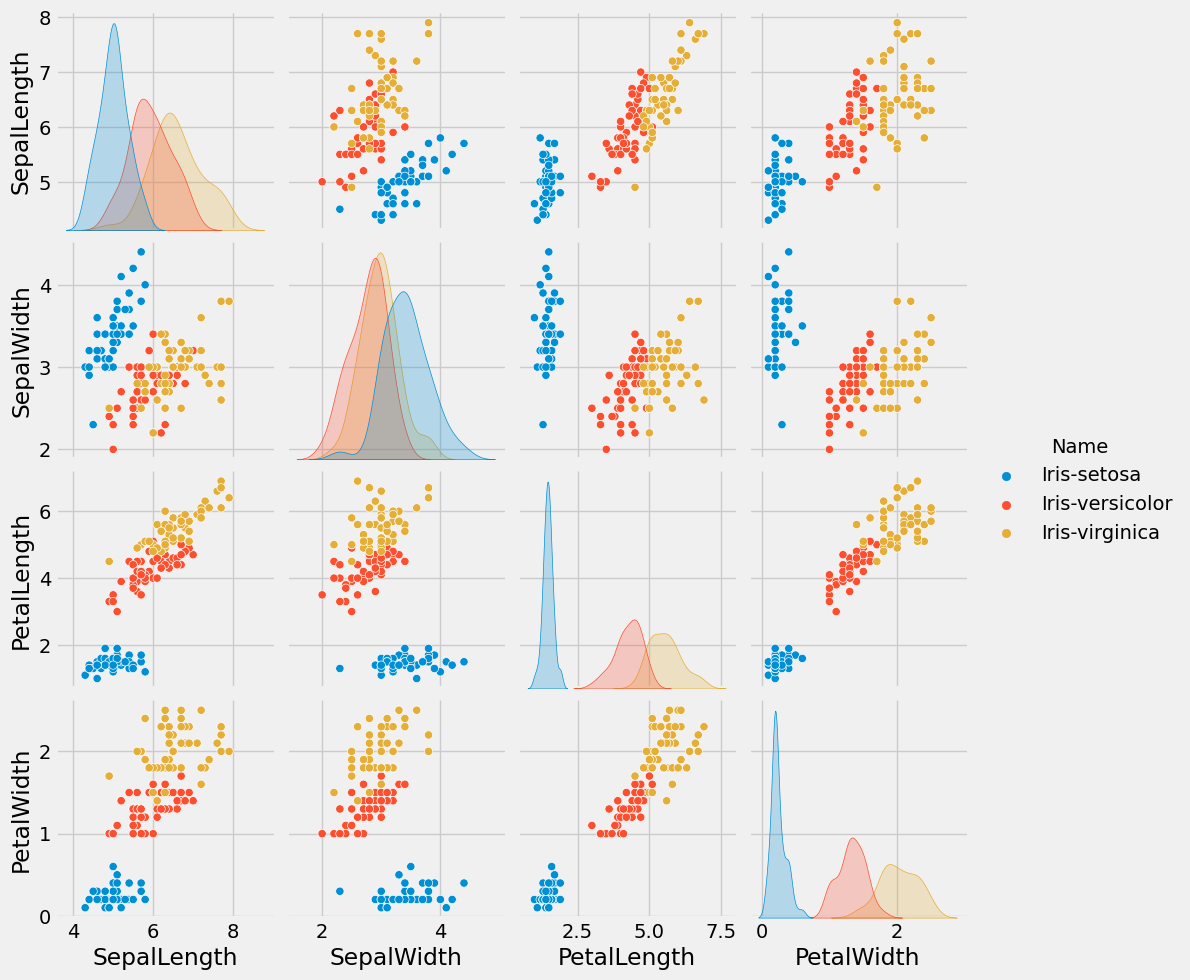

In [ ]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

**Q1. Repeat the above exercise for different values of k**
 - How do the inertia and silhouette scores change?
 > Response: Both inertia and silhouette scores decrease as the number of clusters k increases.
 - What if you don't scale your features?
 > Response: Siginificantly larger values would result in unintended biases.
 - Is there a 'right' k? Why or why not?
 > Response: Unless we have a precise understanding of the data, there is no 'right' k value.

In [ ]:
k_values = [2, 3, 4, 5]
for k in k_values:
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)

  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_

  print("k: ", k)
  print("Inertia: ", inertia)
  print("Silhouette Score: ", metrics.silhouette_score(X_scaled, labels, metric='euclidean'))
  print("")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2
Inertia:  12.14368828157972
Silhouette Score:  0.6294675561906644

k:  3
Inertia:  6.998114004826761
Silhouette Score:  0.5043188549150884

k:  4
Inertia:  5.532831003081897
Silhouette Score:  0.4446273300650682

k:  5
Inertia:  4.580007268756342
Silhouette Score:  0.3500373266251631



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Q2. Repeat the following exercise for food nutrients dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kartikjindgar/NYU-DataScience-Bootcamp-Fall23/main/Week7/nutrients.txt", delimiter='\s+')
df.head(5)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


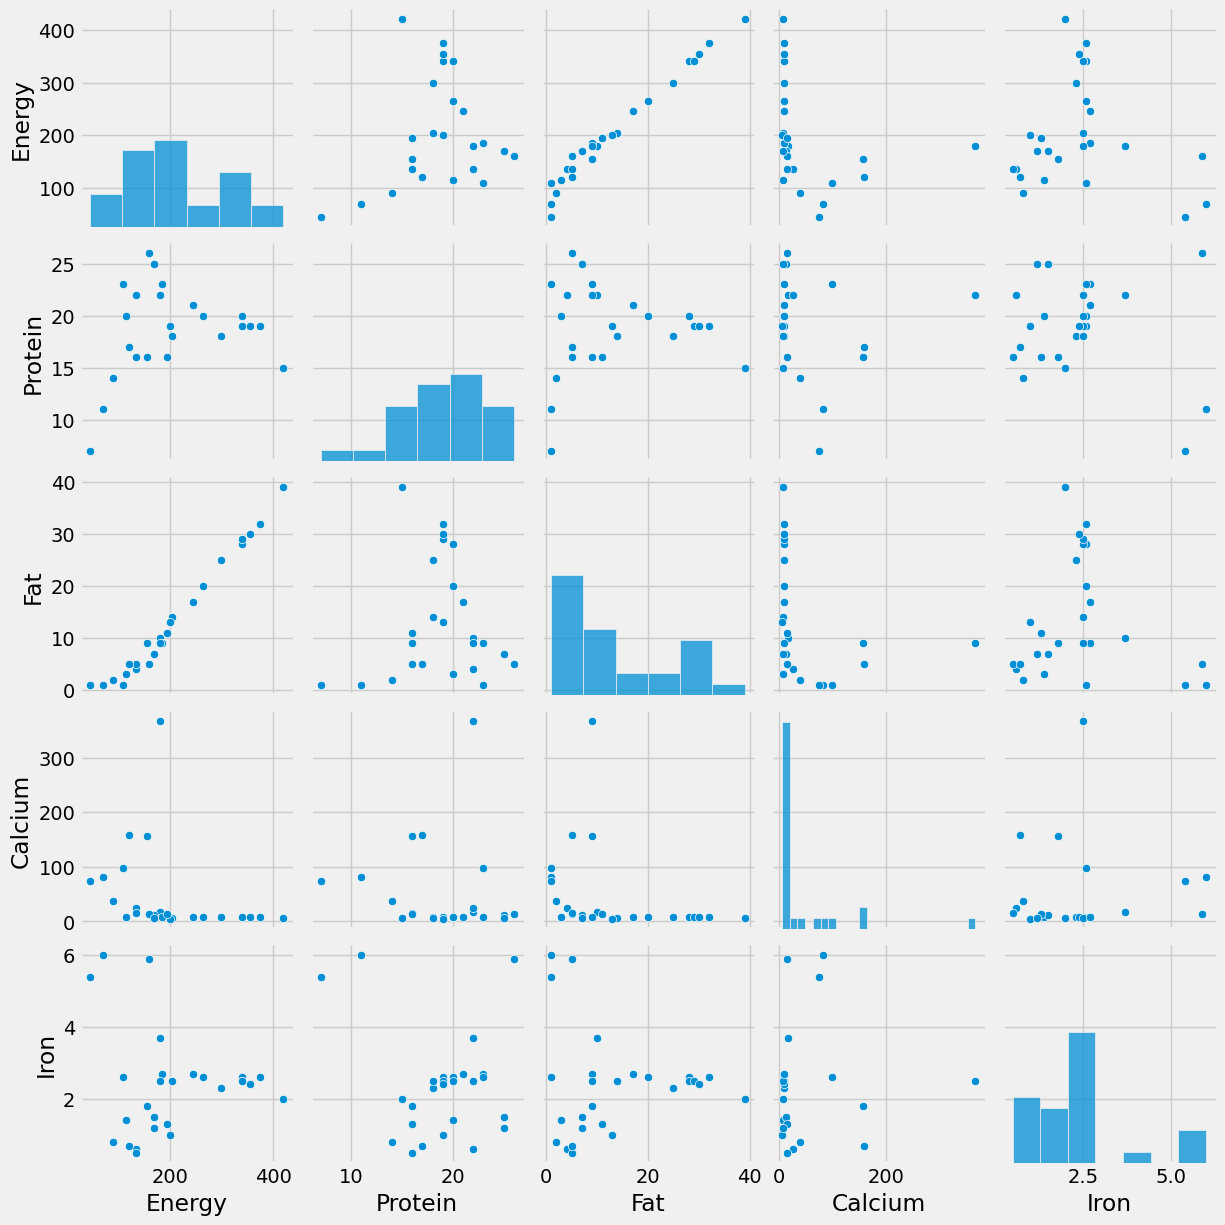

In [ ]:
cols = df.columns[1:]
sns.pairplot(df[cols])

In [ ]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.328460,0.107632,0.342088
std,0.269887,0.223773,0.296238,0.215564,0.265692
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.105263,0.011050,0.154545
50%,0.360000,0.631579,0.210526,0.011050,0.363636
75%,0.633333,0.789474,0.565789,0.073204,0.381818
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [ ]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.37853125817495303

In [ ]:
df['label'] = labels
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,label
0,Braised beef,340,20,28,9,2.6,0
1,Hamburger,245,21,17,9,2.7,0
2,Roast beef,420,15,39,7,2.0,0
3,Beefsteak,375,19,32,9,2.6,0
4,Canned beef,180,22,10,17,3.7,1


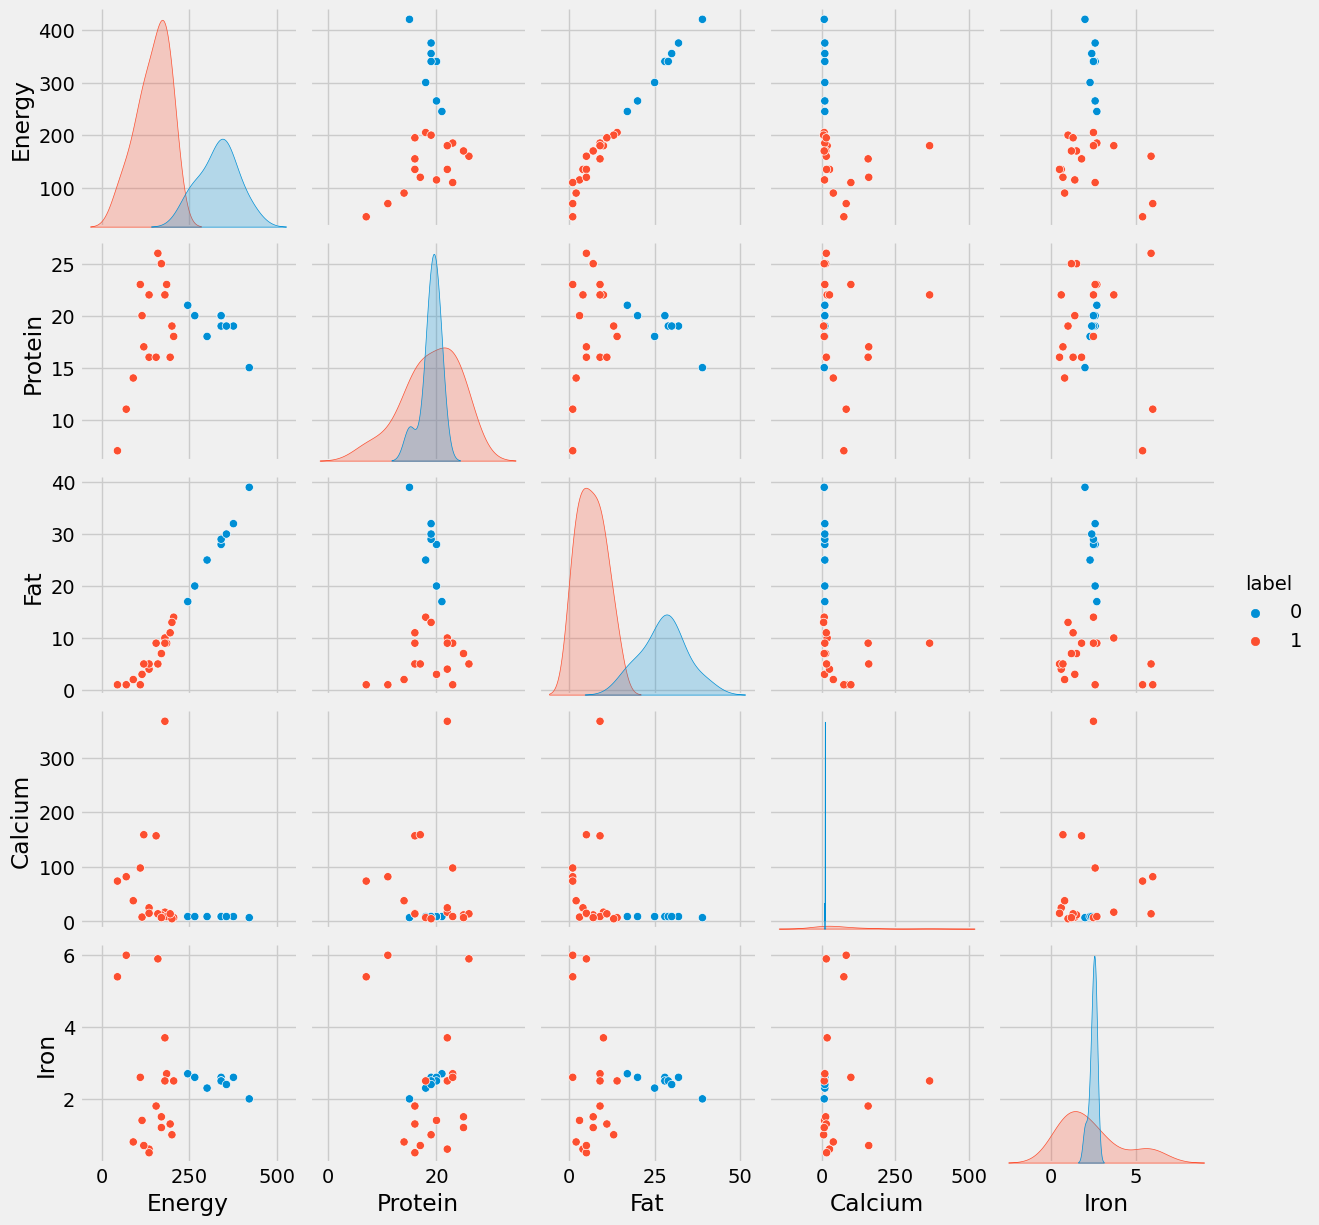

In [ ]:
cols = df.columns[1:-1]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

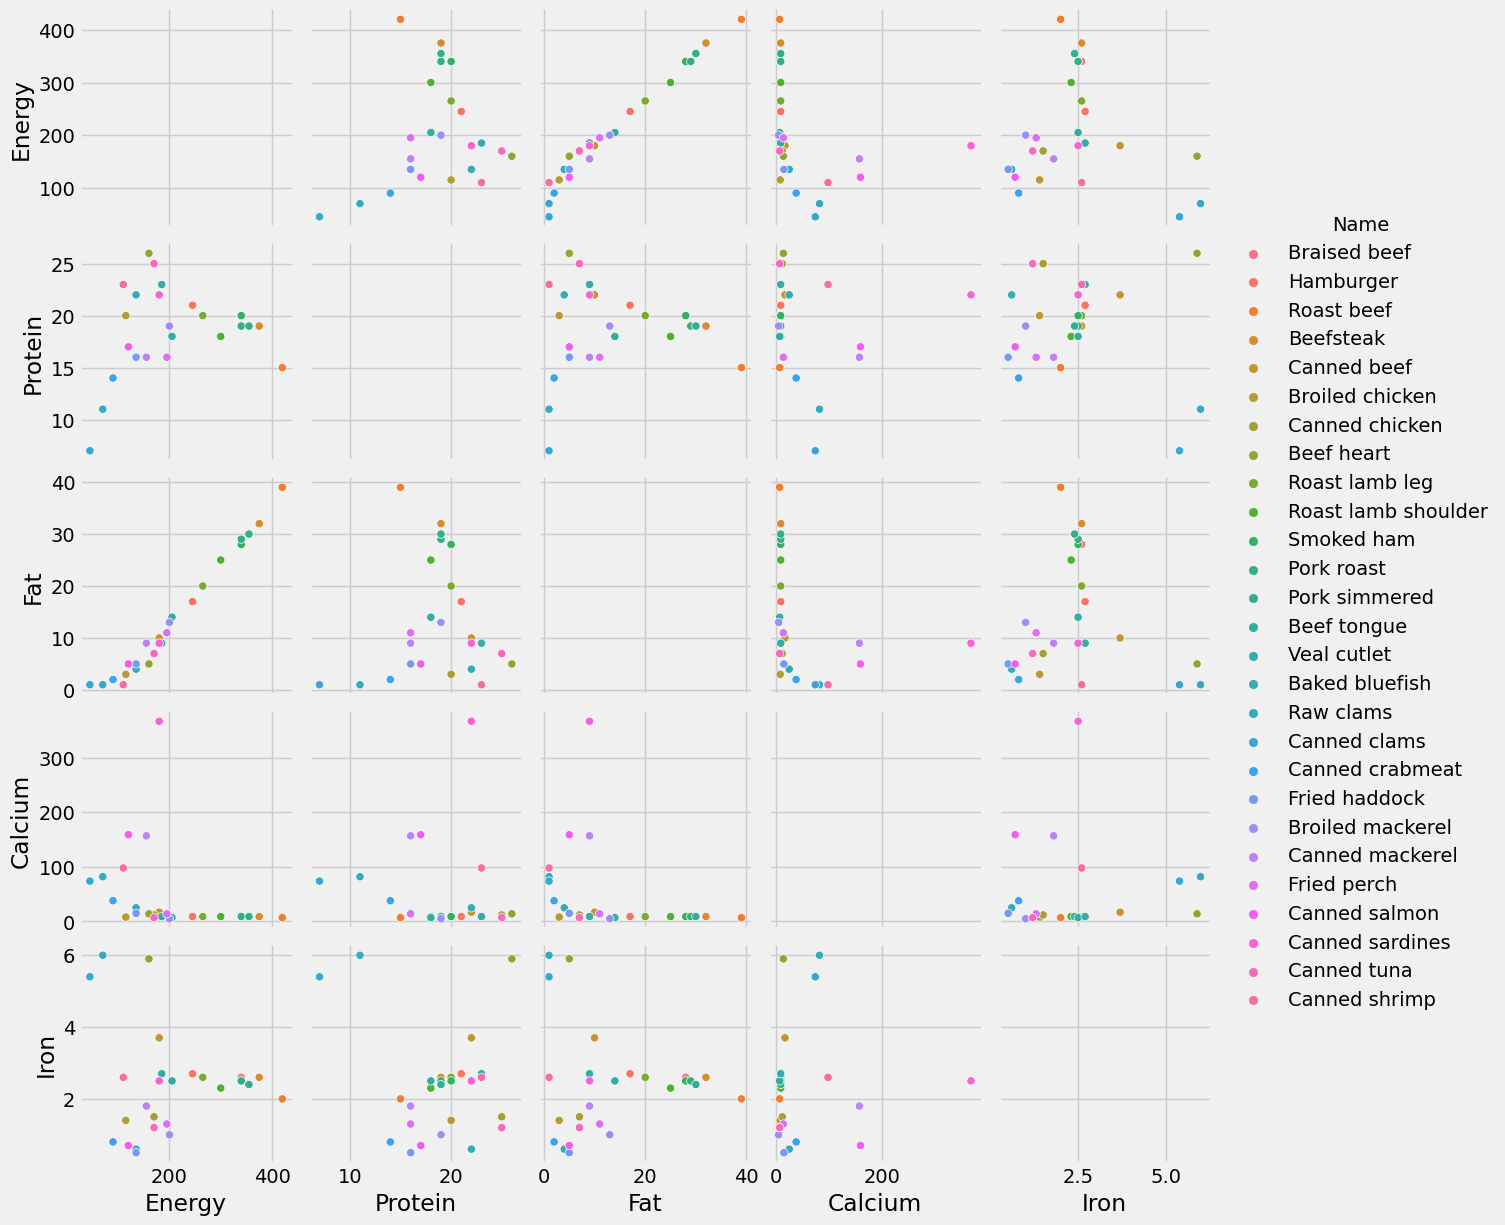

In [ ]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')